In [4]:
!pip install pyhepmc



Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.5/577.5 kB 15.7 MB/s eta 0:00:00


Processando evento 0 de 10000...
Processando evento 1000 de 10000...
Processando evento 2000 de 10000...
Processando evento 3000 de 10000...
Processando evento 4000 de 10000...
Processando evento 5000 de 10000...
Processando evento 6000 de 10000...
Processando evento 7000 de 10000...
Processando evento 8000 de 10000...
Processando evento 9000 de 10000...


/home/matheusgeraldes/.local/lib/python3.9/site-packages/mplhep/utils.py:198: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/home/matheusgeraldes/.local/lib/python3.9/site-packages/mplhep/utils.py:198: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


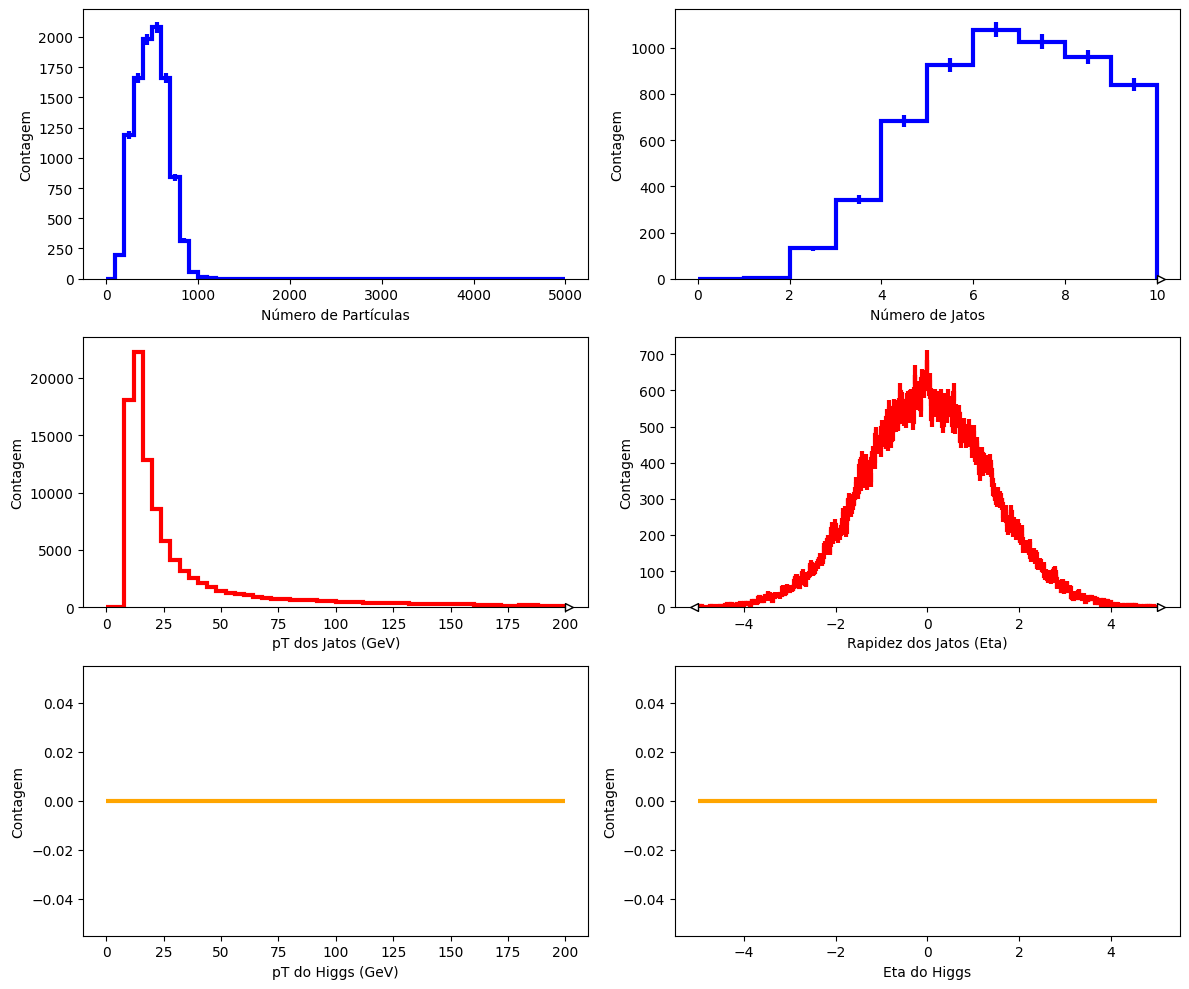

In [3]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt

# Caminho para o arquivo .hepmc
hepmc_file = 'tag_1_pythia8_events.hepmc'

# Definir histos
histo_njets  = hist.Hist.new.Reg(10, 0., 10.).Double()
histo_jets_pt  = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_jets_eta = hist.Hist.new.Reg(500, -5., +5.).Double()
histo_npart  = hist.Hist.new.Reg(50, 0., 5000.).Double()
histo_higgs_pt  = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_higgs_eta = hist.Hist.new.Reg(50, -5., +5.).Double()

# Função para ler o arquivo HEPMC e extrair os eventos
def read_hepmc_file(hepmc_file):
    events = []
    with hep.open(hepmc_file) as f:
        for event in f:
            events.append(event)  # Adiciona o evento ao arquivo
    return events

# Função para calcular o momento transversal (pT)
def get_pt(particle):
    return np.sqrt(particle.momentum.x**2 + particle.momentum.y**2)

# Função para calcular a pseudorapidez (eta)
def get_eta(particle):
    p = np.sqrt(particle.momentum.x**2 + particle.momentum.y**2 + particle.momentum.z**2)
    if p == 0 or np.isclose(particle.momentum.z, p) or np.isclose(particle.momentum.z, -p):
        return np.nan  # Retorna NaN se não puder calcular
    return 0.5 * np.log((p + particle.momentum.z) / (p - particle.momentum.z))

# Função para analisar o evento e preencher os histogramas de jatos
def analyze_event(event):
    # Filtrar partículas com pT > 10 GeV para reconstruir jatos
    particles = [p for p in event.particles if p.status == 1]  # Somente partículas finais (status 1)
    
    # Identificar jatos a partir de partículas com pT > 10 GeV
    jets = [p for p in particles if get_pt(p) > 10.0]  # Filtra partículas com pT > 10 GeV (jatos)
    
    # Preencher histogramas de jatos
    njets = len(jets)
    histo_njets.fill(njets)
    
    for jet in jets:
        histo_jets_pt.fill(get_pt(jet))  # Preencher o histograma de pT dos jatos
        histo_jets_eta.fill(get_eta(jet))  # Preencher o histograma de eta dos jatos

    # Número de partículas no evento
    npart = len(particles)
    histo_npart.fill(npart)

    # Analisar partículas Higgs
    for part in particles:
        if part.pid == 25:  # Higgs
            histo_higgs_pt.fill(get_pt(part))  # Preencher o histograma de pT do Higgs
            histo_higgs_eta.fill(get_eta(part))  # Preencher o histograma de eta do Higgs

# Função para visualizar os histogramas
def plot_histograms():
    fig, ax = plt.subplots(3, 2, figsize=(12, 10))

    histo_npart.plot(ax=ax[0, 0], ls="-", color="blue", lw=3)
    ax[0, 0].set(xlabel='Número de Partículas', ylabel='Contagem')

    histo_njets.plot(ax=ax[0, 1], ls="-", color="blue", lw=3)
    ax[0, 1].set(xlabel='Número de Jatos', ylabel='Contagem')

    histo_jets_pt.plot(ax=ax[1, 0], ls="-", color="red", lw=3)
    ax[1, 0].set(xlabel='pT dos Jatos (GeV)', ylabel='Contagem')

    histo_jets_eta.plot(ax=ax[1, 1], ls="-", color="red", lw=3)
    ax[1, 1].set(xlabel='Rapidez dos Jatos (Eta)', ylabel='Contagem')

    histo_higgs_pt.plot(ax=ax[2, 0], ls="-", color="orange", lw=3)
    ax[2, 0].set(xlabel='pT do Higgs (GeV)', ylabel='Contagem')

    histo_higgs_eta.plot(ax=ax[2, 1], ls="-", color="orange", lw=3)
    ax[2, 1].set(xlabel='Eta do Higgs', ylabel='Contagem')

    plt.tight_layout()
    plt.show()

# Ler eventos do arquivo HEPMC
events = read_hepmc_file(hepmc_file)

# Loop sobre os eventos e realizar a análise
nevt = len(events)
for ievt in range(nevt):
    if ievt % 1000 == 0:
        print(f"Processando evento {ievt} de {nevt}...")

    event = events[ievt]

    # Analisar o evento e preencher os histogramas
    analyze_event(event)

# Plotar os histogramas
plot_histograms()


Processando evento 0 de 10000...
Processando evento 1000 de 10000...
Processando evento 2000 de 10000...
Processando evento 3000 de 10000...
Processando evento 4000 de 10000...
Processando evento 5000 de 10000...
Processando evento 6000 de 10000...
Processando evento 7000 de 10000...
Processando evento 8000 de 10000...
Processando evento 9000 de 10000...


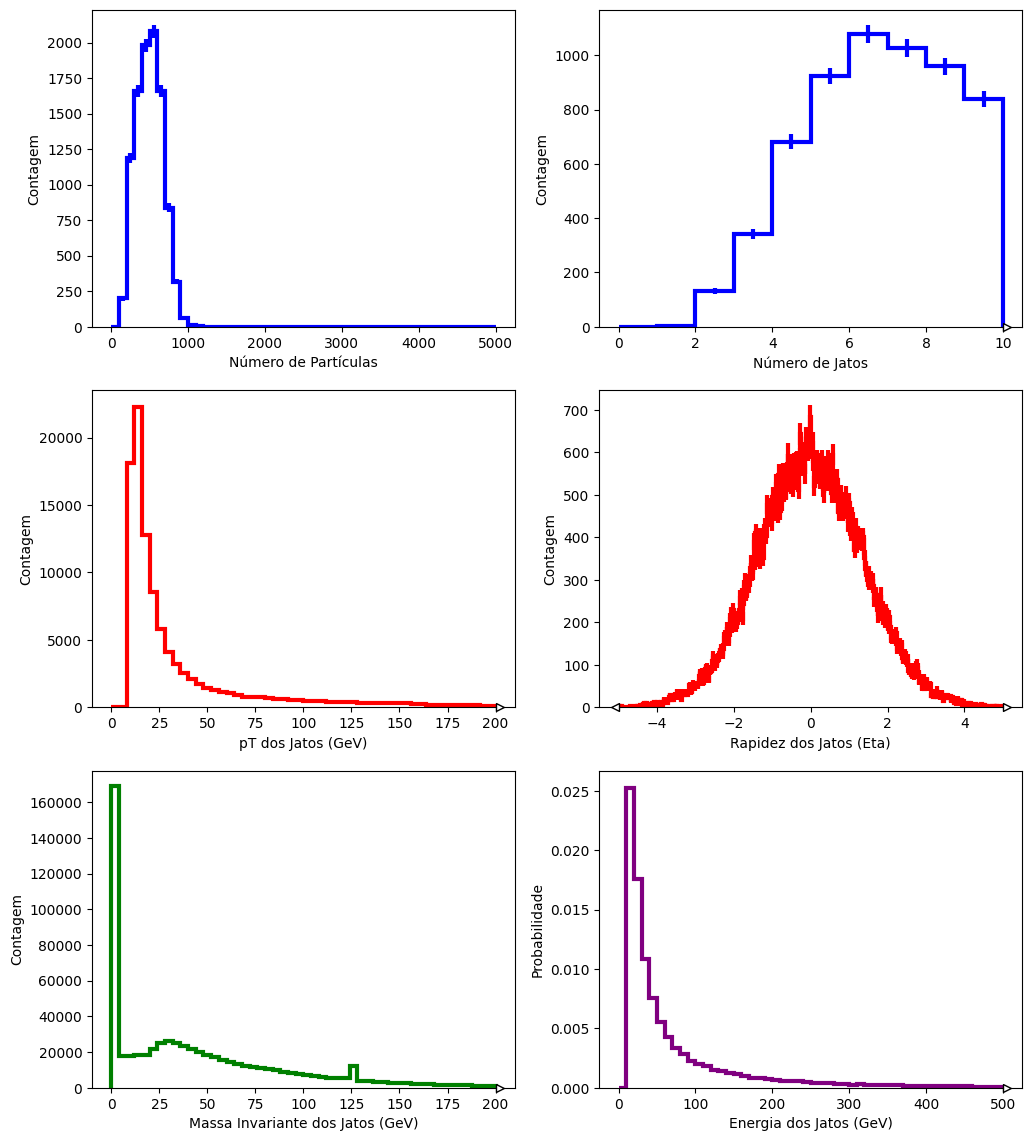

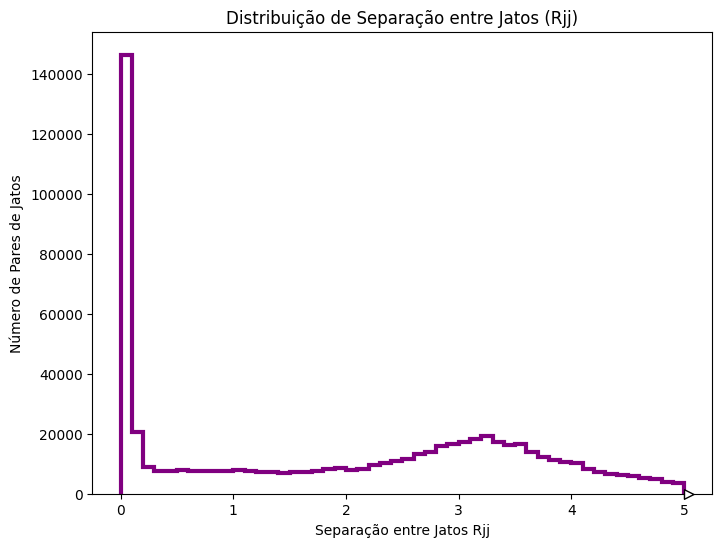

In [20]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt

# Caminho para o arquivo .hepmc
hepmc_file = 'tag_1_pythia8_events.hepmc'

# Definir histos
histo_njets  = hist.Hist.new.Reg(10, 0., 10.).Double()
histo_jets_pt  = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_jets_eta = hist.Hist.new.Reg(500, -5., +5.).Double()
histo_jets_mass = hist.Hist.new.Reg(50, 0., 200.).Double()  # Massa invariante dos jatos
histo_npart  = hist.Hist.new.Reg(50, 0., 5000.).Double()

# Histograma para a distribuição de energia dos jatos
histo_jets_energy = hist.Hist.new.Reg(50, 0., 500.).Double()  # Energia dos jatos

# Histograma para a distribuição de separação entre jatos (Rjj)
histo_rjj = hist.Hist.new.Reg(50, 0., 5.0).Double()  # Separação entre jatos (Rjj)

# Função para ler o arquivo HEPMC e extrair os eventos
def read_hepmc_file(hepmc_file):
    events = []
    with hep.open(hepmc_file) as f:
        for event in f:
            events.append(event)  # Adiciona o evento ao arquivo
    return events

# Função para calcular o momento transversal (pT)
def get_pt(particle):
    return np.sqrt(particle.momentum.x**2 + particle.momentum.y**2)

# Função para calcular a pseudorapidez (eta)
def get_eta(particle):
    p = np.sqrt(particle.momentum.x**2 + particle.momentum.y**2 + particle.momentum.z**2)
    if p == 0 or np.isclose(particle.momentum.z, p) or np.isclose(particle.momentum.z, -p):
        return np.nan  # Retorna NaN se não puder calcular
    return 0.5 * np.log((p + particle.momentum.z) / (p - particle.momentum.z))

# Função para calcular o ângulo azimutal (phi)
def get_phi(particle):
    return np.arctan2(particle.momentum.y, particle.momentum.x)

# Função para calcular a energia de uma partícula
def get_energy(particle):
    return particle.momentum.e

# Função para calcular a separação Rjj entre dois jatos
def delta_r(jet1, jet2):
    delta_eta = get_eta(jet1) - get_eta(jet2)
    delta_phi = get_phi(jet1) - get_phi(jet2)
    return np.sqrt(delta_eta**2 + delta_phi**2)

# Função para calcular a massa invariante de dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.momentum.e + jet2.momentum.e
    px_tot = jet1.momentum.x + jet2.momentum.x
    py_tot = jet1.momentum.y + jet2.momentum.y
    pz_tot = jet1.momentum.z + jet2.momentum.z
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Função para analisar o evento e preencher os histogramas de jatos
def analyze_event(event):
    # Filtrar partículas com pT > 10 GeV para reconstruir jatos
    particles = [p for p in event.particles if p.status == 1]  # Somente partículas finais (status 1)
    
    # Identificar jatos a partir de partículas com pT > 10 GeV
    jets = [p for p in particles if get_pt(p) > 10.0]  # Filtra partículas com pT > 10 GeV (jatos)
    
    # Preencher histogramas de jatos
    njets = len(jets)
    histo_njets.fill(njets)
    
    # Preencher histogramas de pT, eta, e massa dos jatos
    for jet in jets:
        histo_jets_pt.fill(get_pt(jet))  # Preencher o histograma de pT dos jatos
        histo_jets_eta.fill(get_eta(jet))  # Preencher o histograma de eta dos jatos
        histo_jets_energy.fill(get_energy(jet))  # Preencher o histograma de energia dos jatos
        
    # Preencher histograma de massa invariante dos jatos
    if len(jets) >= 2:
        for i in range(len(jets)-1):
            for j in range(i+1, len(jets)):
                mass = invariant_mass(jets[i], jets[j])
                histo_jets_mass.fill(mass)

                # Preencher histograma de separação Rjj entre os jatos
                rjj = delta_r(jets[i], jets[j])
                histo_rjj.fill(rjj)

    # Número de partículas no evento
    npart = len(particles)
    histo_npart.fill(npart)

# Função para visualizar os histogramas
def plot_histograms():
    fig, ax = plt.subplots(3, 2, figsize=(12, 14))

    histo_npart.plot(ax=ax[0, 0], ls="-", color="blue", lw=3)
    ax[0, 0].set(xlabel='Número de Partículas', ylabel='Contagem')

    histo_njets.plot(ax=ax[0, 1], ls="-", color="blue", lw=3)
    ax[0, 1].set(xlabel='Número de Jatos', ylabel='Contagem')

    histo_jets_pt.plot(ax=ax[1, 0], ls="-", color="red", lw=3)
    ax[1, 0].set(xlabel='pT dos Jatos (GeV)', ylabel='Contagem')

    histo_jets_eta.plot(ax=ax[1, 1], ls="-", color="red", lw=3)
    ax[1, 1].set(xlabel='Rapidez dos Jatos (Eta)', ylabel='Contagem')

    histo_jets_mass.plot(ax=ax[2, 0], ls="-", color="green", lw=3)
    ax[2, 0].set(xlabel='Massa Invariante dos Jatos (GeV)', ylabel='Contagem')

    # Plot para a Distribuição de Energia dos Jatos no eixo [2,1]
    histo_jets_energy.plot(ax=ax[2, 1], ls="-", color="purple", lw=3, density=True)
    ax[2, 1].set(xlabel='Energia dos Jatos (GeV)', ylabel='Probabilidade')
    #ax[2, 1].set_title('Distribuição de Energia dos Jatos')

    # Histograma de separação Rjj entre jatos
    plt.figure(figsize=(8, 6))
    histo_rjj.plot(ls="-", color="purple", lw=3)
    plt.xlabel('Separação entre Jatos Rjj')
    plt.ylabel('Número de Pares de Jatos')
    plt.title('Distribuição de Separação entre Jatos (Rjj)')
    plt.show()

# Ler eventos do arquivo HEPMC
events = read_hepmc_file(hepmc_file)

# Loop sobre os eventos e realizar a análise
nevt = len(events)
for ievt in range(nevt):
    if ievt % 1000 == 0:
        print(f"Processando evento {ievt} de {nevt}...")

    event = events[ievt]

    # Analisar o evento e preencher os histogramas
    analyze_event(event)

# Plotar os histogramas
plot_histograms()
